In [18]:
import sqlite3
import pandas as pd 

conn = sqlite3.connect("viewer_interactions.db")

tables = pd.read_sql("select name from sqlite_master where type='table';", conn)

for t in tables['name']:
    df = pd.read_sql(f"SELECT * FROM {t};", conn)
    df.to_csv(f"{t}.csv", index=False)
    print(f"Exported {t}.csv with {len(df)} rows")


Exported viewer_ratings.csv with 4025000 rows
Exported movies.csv with 18008 rows
Exported user_statistics.csv with 438780 rows
Exported movie_statistics.csv with 16015 rows
Exported data_dictionary.csv with 31 rows


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

%matplotlib inline 

sns.set(style="whitegrid")

In [20]:
movies = pd.read_csv("movies.csv")
movie_stats = pd.read_csv("movie_statistics.csv")
users = pd.read_csv("user_statistics.csv")
ratings = pd.read_csv("viewer_ratings.csv")
data_dict = pd.read_csv("data_dictionary.csv")

for name, df in [("Movies", movies), ("Movie stats", movie_stats), ("Users", users), ("Ratings", ratings)]:
    print(f"\n-- {name} --")
    print(df.head(5))


-- Movies --
   movie_id  year_of_release                         title
0         1         2,003.00               Dinosaur Planet
1         2         2,004.00    Isle of Man TT 2004 Review
2         3         1,997.00                     Character
3         4         1,994.00  Paula Abdul's Get Up & Dance
4         5         2,004.00      The Rise and Fall of ECW

-- Movie stats --
   movie_id  total_ratings  avg_rating  std_rating  min_rating  max_rating  \
0         1         548.00        3.74        1.07        1.00        5.00   
1         2         146.00        3.55        1.28        1.00        5.00   
2         3       2,013.00        3.64        0.98        1.00        5.00   
3         4         142.00        2.74        1.30        1.00        5.00   
4         5       1,140.00        3.92        1.29        1.00        5.00   

   unique_users first_rating_date last_rating_date  year_of_release  \
0        548.00        2003-07-12       2005-12-30         2,003.00   
1 

In [21]:
dfs = {
    "Movies": movies,
    "Movie statistics": movie_stats,
    "User statistics": users,
    "Viewer ratings": ratings,
    "Data dictionary": data_dict
}

for name, df in dfs.items():
    print(f"\n{name.upper()}")
    print(f"Shape: {df.shape}")
    df.info()


MOVIES
Shape: (18008, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18008 entries, 0 to 18007
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         18008 non-null  int64  
 1   year_of_release  18001 non-null  float64
 2   title            18008 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 422.2+ KB

MOVIE STATISTICS
Shape: (16015, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16015 entries, 0 to 16014
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           16015 non-null  int64  
 1   total_ratings      15215 non-null  float64
 2   avg_rating         15215 non-null  float64
 3   std_rating         6847 non-null   float64
 4   min_rating         15215 non-null  float64
 5   max_rating         15215 non-null  float64
 6   unique_users       15215 non-null  fl

In [22]:
import pandas as pd 

files = [
    "viewer_ratings.csv",
    "movies.csv",
    "user_statistics.csv",
    "movie_statistics.csv"
]

for file in files:
    print(f"\n{'='*60}")
    print(f"FILE: {file}")

    df = pd.read_csv(file)

    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
    print(df.info())



FILE: viewer_ratings.csv
Shape: 4025000 rows × 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4025000 entries, 0 to 4024999
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   movie_id        int64  
 1   customer_id     int64  
 2   rating          float64
 3   date            object 
 4   anomalous_date  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 153.5+ MB
None

FILE: movies.csv
Shape: 18008 rows × 3 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18008 entries, 0 to 18007
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         18008 non-null  int64  
 1   year_of_release  18001 non-null  float64
 2   title            18008 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 422.2+ KB
None

FILE: user_statistics.csv
Shape: 438780 rows × 10 columns

<class 'pandas.core.frame.DataFrame'>
Ran

In [23]:
import pandas as pd

#Loading core interactions CSV (adjustested filename just in case)
df = pd.read_csv("viewer_ratings.csv")

#Auto-detect canonical columns and standardize names
cols = [c for c in df.columns]
lower = {c: c.lower() for c in cols}

aliases = {
    "customer_id":    {"user_id","userid","viewer_id","customer_id","account_id","profile_id"},
    "movie_id":   {"movie_id","item_id","content_id","film_id","video_id"},
    "rating":     {"rating","score","stars","rate","rating_value"},
    "date":  {"timestamp","date","datetime","time","event_time","created_at","rated_at","viewed_at"}
}

def pick(colset):
    for raw in cols:
        if lower[raw] in colset:
            return raw
    return None

user_col = pick(aliases["customer_id"])
item_col = pick(aliases["movie_id"])
rate_col = pick(aliases["rating"])
time_col = pick(aliases["date"])

#Rename whatever we found to canonical names
rename_map = {}
if user_col: rename_map[user_col] = "customer_id"
if item_col: rename_map[item_col] = "movie_id"
if rate_col: rename_map[rate_col] = "rating"
if time_col: rename_map[time_col] = "date"
df = df.rename(columns=rename_map)

print("Standardized columns →", rename_map)
print("All columns:", df.columns.tolist())

#Safe cleaning that only uses columns if present ---
#Date to datetime + time features
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df["year_month"] = df["date"].dt.to_period("M")

#Rating to 0–5 range
if "rating" in df.columns:
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
    df = df[df["rating"].between(0, 5)]  # NOTE: between() is inclusive of 0 and 5

#Drop duplicates with the subset that actually exists
subset = [c for c in ["customer_id","movie_id","date"] if c in df.columns]
df = df.drop_duplicates(subset=subset) if subset else df.drop_duplicates()

#Drop rows missing critical fields (only if those columns exist)
need = [c for c in ["rating","customer_id","movie_id"] if c in df.columns]
if need:
    df = df.dropna(subset=need)

print("Cleaned shape:", df.shape)
df.head()
  

Standardized columns → {'customer_id': 'customer_id', 'movie_id': 'movie_id', 'rating': 'rating', 'date': 'date'}
All columns: ['movie_id', 'customer_id', 'rating', 'date', 'anomalous_date']
Cleaned shape: (3622124, 6)


,movie_id,customer_id,rating,date,anomalous_date,year_month
0,17,1481737,3.00,2005-10-09,NaN,2005-10
1,9236,1448424,5.00,2005-11-15,NaN,2005-11
3,9330,674346,3.00,2005-04-29,NaN,2005-04
4,4570,1304045,4.00,2005-09-19,NaN,2005-09
5,9320,1036533,5.00,2004-08-05,NaN,2004-08


In [ ]:
ratings = pd.read_csv("viewer_ratings.csv")
movies = pd.read_csv("movies.csv")
movie_stats = pd.read_csv("movie_statistics.csv")
user_stats = pd.read_csv("user_statistics.csv")

datasets = {
    "Ratings": ratings,
    "Movies": movies,
    "Movie statistics": movie_stats,
    "User statistics": user_stats
}

for name, df in datasets.items():
    print(f"\n=== {name.upper()} ===")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    
    display(df.head(3)) 
    
    print("\nInfo:")
    df.info()


=== RATINGS ===
Shape: 4025000 rows × 5 columns


,movie_id,customer_id,rating,date,anomalous_date
0,17,1481737,3.00,2005-10-09,NaN
1,9236,1448424,5.00,2005-11-15,NaN
2,4640,2308980,NaN,2005-08-06,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4025000 entries, 0 to 4024999
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   movie_id        int64  
 1   customer_id     int64  
 2   rating          float64
 3   date            object 
 4   anomalous_date  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 153.5+ MB

=== MOVIES ===
Shape: 18008 rows × 3 columns


,movie_id,year_of_release,title
0,1,"2,003.00",Dinosaur Planet
1,2,"2,004.00",Isle of Man TT 2004 Review
2,3,"1,997.00",Character



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18008 entries, 0 to 18007
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         18008 non-null  int64  
 1   year_of_release  18001 non-null  float64
 2   title            18008 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 422.2+ KB

=== MOVIE STATISTICS ===
Shape: 16015 rows × 11 columns


,movie_id,total_ratings,avg_rating,std_rating,min_rating,max_rating,unique_users,first_rating_date,last_rating_date,year_of_release,title
0,1,548.00,3.74,1.07,1.00,5.00,548.00,2003-07-12,2005-12-30,"2,003.00",Dinosaur Planet
1,2,146.00,3.55,1.28,1.00,5.00,146.00,2004-10-16,2005-12-20,"2,004.00",Isle of Man TT 2004 Review
2,3,"2,013.00",3.64,0.98,1.00,5.00,"2,013.00",2000-10-19,2005-12-30,"1,997.00",Character



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16015 entries, 0 to 16014
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           16015 non-null  int64  
 1   total_ratings      15215 non-null  float64
 2   avg_rating         15215 non-null  float64
 3   std_rating         6847 non-null   float64
 4   min_rating         15215 non-null  float64
 5   max_rating         15215 non-null  float64
 6   unique_users       15215 non-null  float64
 7   first_rating_date  16015 non-null  object 
 8   last_rating_date   16015 non-null  object 
 9   year_of_release    11504 non-null  float64
 10  title              11508 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 1.3+ MB

=== USER STATISTICS ===
Shape: 438780 rows × 10 columns


,customer_id,total_ratings,avg_rating,std_rating,min_rating,max_rating,unique_movies,first_rating_date,last_rating_date,activity_days
0,1965326,8.00,3.25,0.89,2.00,5.00,8.00,2004-08-11,2005-06-06,299.00
1,506434,1.00,4.00,NaN,4.00,4.00,1.00,2005-08-02,2005-08-02,0.00
2,1365167,3.00,4.67,0.58,4.00,5.00,3.00,2004-11-16,2005-01-19,64.00



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438780 entries, 0 to 438779
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        438780 non-null  int64  
 1   total_ratings      416841 non-null  float64
 2   avg_rating         416841 non-null  float64
 3   std_rating         332528 non-null  float64
 4   min_rating         416841 non-null  float64
 5   max_rating         416841 non-null  float64
 6   unique_movies      416841 non-null  float64
 7   first_rating_date  438780 non-null  object 
 8   last_rating_date   438780 non-null  object 
 9   activity_days      416841 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 33.5+ MB


In [25]:
df = ratings.copy()

cols = list(df.columns)
lower_map = {c: c.lower() for c in cols}

aliases = {
    "customer_id":    {"user_id", "userid", "viewer_id", "customer_id", "account_id", "profile_id"},
    "movie_id":   {"movie_id", "item_id", "content_id", "film_id", "video_id"},
    "rating":     {"rating", "score", "stars", "rate", "rating_value"},
    "date":  {"timestamp", "date", "datetime", "time", "event_time", "created_at", "rated_at", "viewed_at"}
}

canonical = {}

for target, candidates in aliases.items():
    for original in cols:
        if lower_map[original] in candidates:
            canonical[target] = original
            break

print("Detected columns:", canonical)


rename_dict = {v: k for k, v in canonical.items()}
df = df.rename(columns=rename_dict)


if "rating" in df.columns:
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
    df = df[df["rating"].between(0, 5)]
    
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

critical_cols = [c for c in ["customer_id", "movie_id", "rating"] if c in df.columns]
if critical_cols:
    df = df.dropna(subset=critical_cols)

subset = [c for c in ["customer_id", "movie_id", "date"] if c in df.columns]
if subset:
    df = df.drop_duplicates(subset=subset)
else:
    df = df.drop_duplicates()

print("\nAfter cleaning, ratings shape:", df.shape)
display(df.head())
  

Detected columns: {'customer_id': 'customer_id', 'movie_id': 'movie_id', 'rating': 'rating', 'date': 'date'}

After cleaning, ratings shape: (3622124, 5)


,movie_id,customer_id,rating,date,anomalous_date
0,17,1481737,3.00,2005-10-09,NaN
1,9236,1448424,5.00,2005-11-15,NaN
3,9330,674346,3.00,2005-04-29,NaN
4,4570,1304045,4.00,2005-09-19,NaN
5,9320,1036533,5.00,2004-08-05,NaN


In [26]:
df_merged = df.copy()

#Merge movies (if movie_id exists in both)
if "movie_id" in df_merged.columns and "movie_id" in movies.columns:
    df_merged = df_merged.merge(
        movies,
        on="movie_id",
        how="left",
        suffixes=("", "_movie")
    )

#Merge movie_statistics (if key exists)
if "movie_id" in df_merged.columns and "movie_id" in movie_stats.columns:
    df_merged = df_merged.merge(
        movie_stats,
        on="movie_id",
        how="left",
        suffixes=("", "_movie_stats")
    )

#Merge user_statistics (if key exists)
if "customer_id" in df_merged.columns and "customer_id" in user_stats.columns:
    df_merged = df_merged.merge(
        user_stats,
        on="customer_id",
        how="left",
        suffixes=("", "_user_stats")
    )

print("Merged dataset shape:", df_merged.shape)
display(df_merged.head(3))


Merged dataset shape: (3622133, 26)


,movie_id,customer_id,rating,date,anomalous_date,year_of_release,title,total_ratings,avg_rating,std_rating,min_rating,max_rating,unique_users,first_rating_date,last_rating_date,year_of_release_movie_stats,title_movie_stats,total_ratings_user_stats,avg_rating_user_stats,std_rating_user_stats,min_rating_user_stats,max_rating_user_stats,unique_movies,first_rating_date_user_stats,last_rating_date_user_stats,activity_days
0,17,1481737,3.00,2005-10-09,NaN,"2,005.00",7 Seconds,"7,108.00",2.90,NaN,1.00,5.00,"7,108.00",2005-06-17,2005-12-30,"2,005.00",7 Seconds,6.00,4.00,0.89,3.00,5.00,6.00,2003-03-13,2005-10-09,941.00
1,9236,1448424,5.00,2005-11-15,NaN,"1,998.00",South Park: Season 2,"17,308.00",NaN,1.13,1.00,5.00,"17,308.00",2003-01-21,2005-12-31,"1,998.00",South Park: Season 2,15.00,4.00,1.07,1.00,5.00,15.00,2005-09-26,2005-11-15,50.00
2,9330,674346,3.00,2005-04-29,NaN,"1,965.00",For a Few Dollars More,"17,108.00",4.01,0.86,1.00,5.00,"17,108.00",1999-01-10,2005-12-31,"1,965.00",For a Few Dollars More,53.00,4.04,0.83,2.00,5.00,53.00,2005-03-21,2005-12-07,261.00


In [ ]:
df_merged = df.copy()  

print("== Basic numeric description of key columns ==")

numeric_cols = df_merged.select_dtypes(include="number").columns.tolist()

display(df_merged[numeric_cols].describe().T)

print("\n== Missing values (% of rows) by column ==")
missing_pct = df_merged.isna().mean().sort_values(ascending=False) * 100
display(missing_pct.to_frame("missing_pct"))


== Basic numeric description of key columns ==


,count,mean,std,min,25%,50%,75%,max
movie_id,"3,622,124.00","6,910.40","5,033.15",1.00,"4,503.00","9,217.00","13,375.00","25,000.00"
customer_id,"3,622,124.00","1,321,917.73","764,616.16",6.00,"660,096.00","1,317,838.00","1,984,101.00","2,649,429.00"
rating,"3,622,124.00",3.61,1.08,0.00,3.00,4.00,4.00,5.00
anomalous_date,"1,103.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00



== Missing values (% of rows) by column ==


,missing_pct
anomalous_date,99.97
movie_id,0.00
customer_id,0.00
rating,0.00
date,0.00


In [28]:
df_valid = movie_stats.dropna(subset=["total_ratings", "avg_rating"]).copy()
print(df_valid.shape)
df_valid["std_rating"] = df_valid["std_rating"].fillna(0)

(14445, 11)


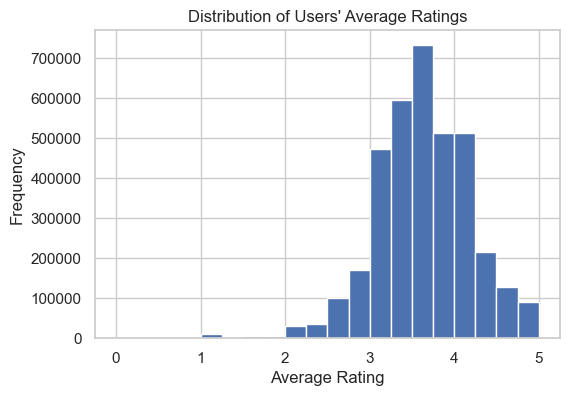

In [ ]:
user_avg_rating = df_merged.groupby("customer_id")["rating"].mean().reset_index()

df_merged = df_merged.merge(user_avg_rating, on="customer_id", how="left", suffixes=("", "_avg"))

df_merged["rating_avg"].hist(bins=20, figsize=(6,4))
plt.title("Distribution of Users' Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.show()


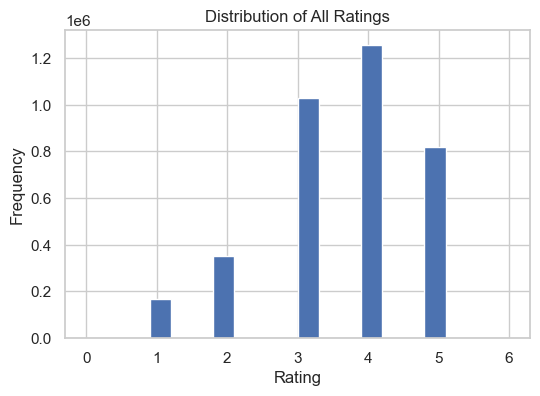

In [30]:
ratings["rating"].hist(bins=20, figsize=(6,4))
plt.title("Distribution of All Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

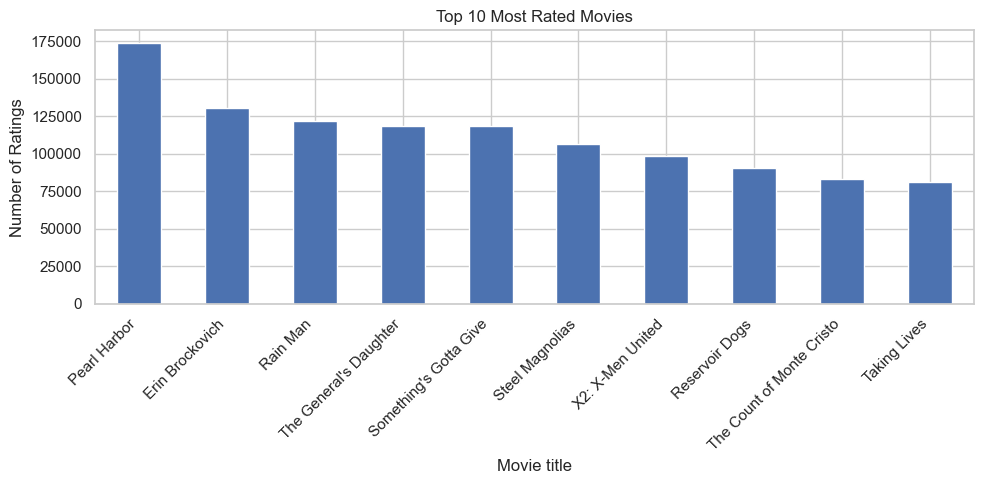

In [ ]:
df = ratings.merge(movies[['movie_id', 'title']], on='movie_id', how='left')

top_movies = df['title'].value_counts().nlargest(10)

top_movies.plot(kind='bar', figsize=(10,5), title='Top 10 Most Rated Movies')

plt.xlabel("Movie title")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


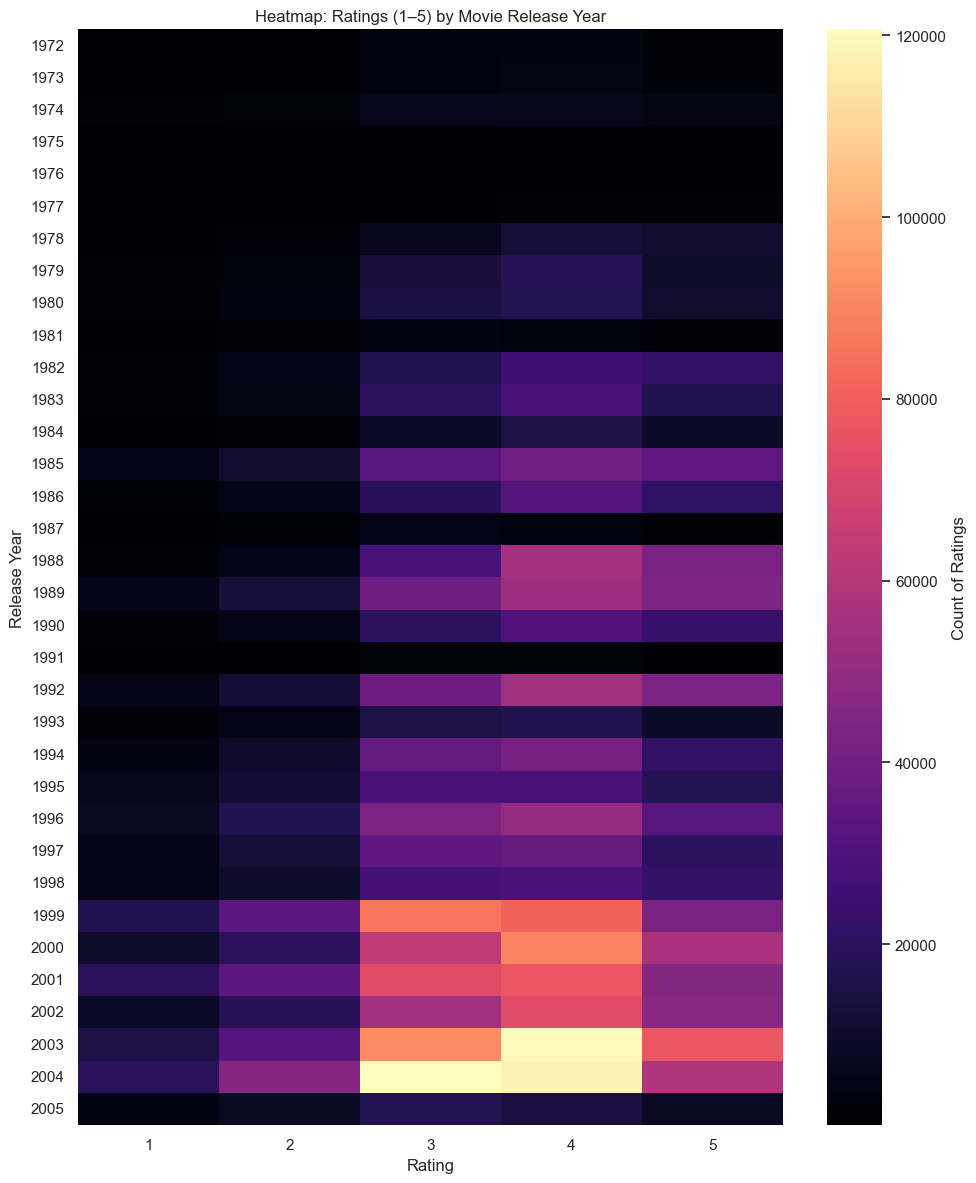

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

ratings_df = df.copy()

df_heat = ratings_df.merge(
    movies[["movie_id", "year_of_release"]],
    on="movie_id",
    how="left"
)

df_heat["year_of_release"] = (
    df_heat["year_of_release"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)

df_heat = df_heat.dropna(subset=["year_of_release", "rating"])
df_heat["year_of_release"] = df_heat["year_of_release"].astype(int)

df_heat = df_heat[df_heat["rating"].between(1, 5)]
df_heat["rating_int"] = df_heat["rating"].round().astype(int)

df_heat = df_heat[df_heat["year_of_release"] >= 1972]

heatmap_data = df_heat.pivot_table(
    index="year_of_release",
    columns="rating_int",
    values="customer_id",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(10, 12))
sns.heatmap(
    heatmap_data,
    cmap="magma",
    annot=False,
    cbar_kws={"label": "Count of Ratings"}
)

plt.title("Heatmap: Ratings (1–5) by Movie Release Year")
plt.xlabel("Rating")
plt.ylabel("Release Year")
plt.tight_layout()
plt.show()


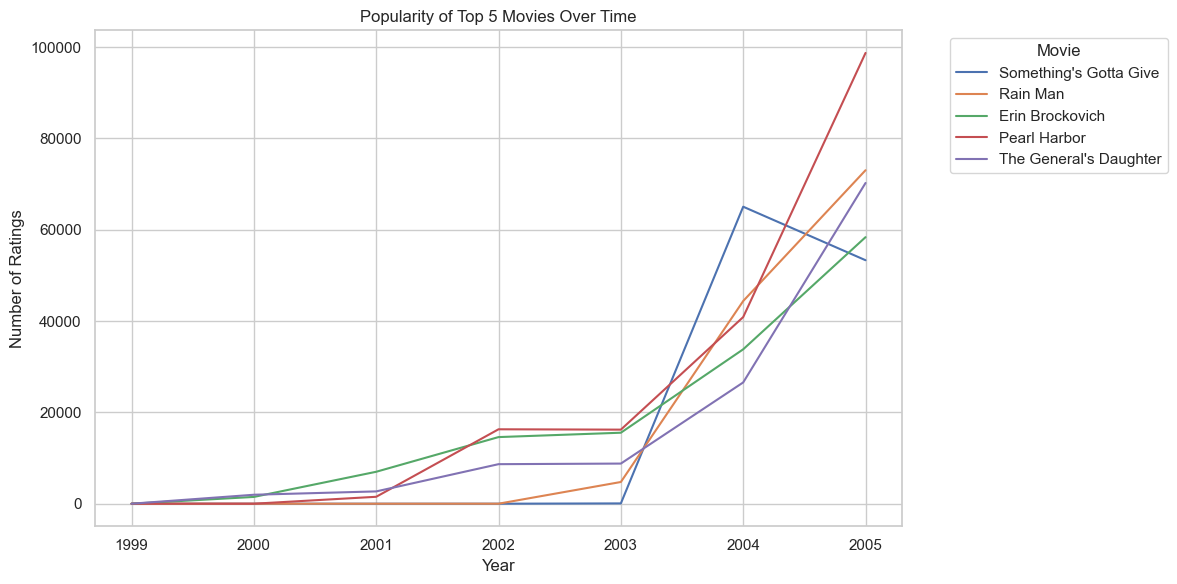

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ratings_clean = df.copy()

ratings_clean["date"] = pd.to_datetime(ratings_clean["date"], errors="coerce")
ratings_clean = ratings_clean.dropna(subset=["date"])

ratings_clean["year"] = ratings_clean["date"].dt.year

movie_counts = (
    ratings_clean.groupby("movie_id")
                 .size()
                 .reset_index(name="num_ratings")
                 .sort_values("num_ratings", ascending=False)
)

top_movies = movie_counts.head(5)["movie_id"].tolist()

subset = ratings_clean[ratings_clean["movie_id"].isin(top_movies)]

title_map = (
    movies[["movie_id", "title"]]
    .drop_duplicates()
    .set_index("movie_id")["title"]
    .to_dict()
)

popularity = (
    subset.groupby(["year", "movie_id"])
          .size()
          .reset_index(name="num_ratings")
          .pivot(index="year", columns="movie_id", values="num_ratings")
          .fillna(0)
          .sort_index()
)

plt.figure(figsize=(12, 6))

for movie_id in popularity.columns:
    label = title_map.get(movie_id, f"Movie {movie_id}")
    plt.plot(popularity.index, popularity[movie_id], label=label)

plt.title("Popularity of Top 5 Movies Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.legend(title="Movie", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


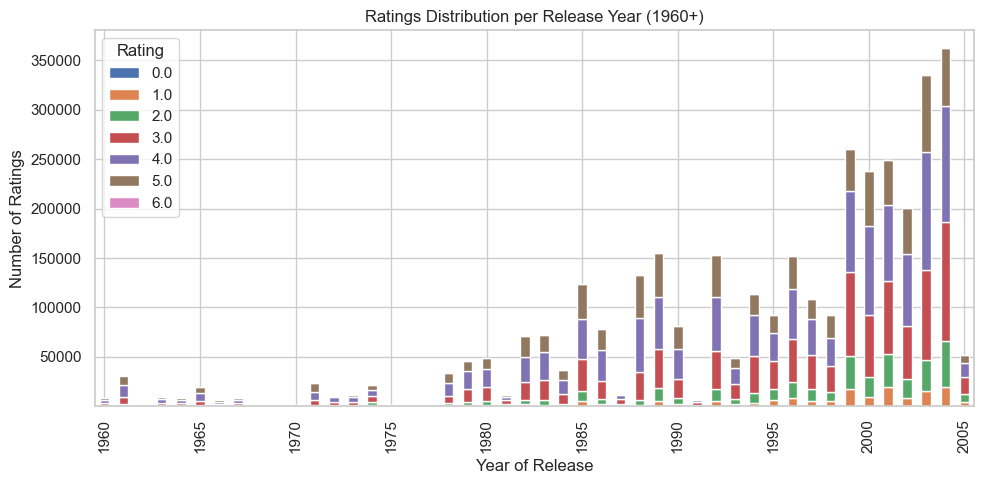

In [ ]:
ratings_clean = df.copy()

movies_year = movies[["movie_id", "year_of_release"]].copy()
movies_year["year_of_release"] = (
    movies_year["year_of_release"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)

vr_with_year = ratings_clean.merge(
    movies_year,
    on="movie_id",
    how="left"
)

vr_with_year = vr_with_year[vr_with_year["year_of_release"] >= 1960]

ratings_by_year = (
    vr_with_year
    .groupby(["year_of_release", "rating"])
    .size()
    .reset_index(name="count")
)

ratings_dist_year = ratings_by_year.pivot_table(
    index="year_of_release",
    columns="rating",
    values="count",
    fill_value=0
).sort_index()

ratings_dist_year.index = ratings_dist_year.index.astype(int)

ratings_dist_year.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 5)
)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.title("Ratings Distribution per Release Year (1960+)")
plt.xlabel("Year of Release")
plt.ylabel("Number of Ratings")
plt.legend(title="Rating")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd 
movie_stats=pd.read_csv("movie_statistics.csv")
users=pd.read_csv("user_statistics.csv")
viewer_ratings=pd.read_csv("viewer_ratings.csv")

PREDICTIONS - LINEAR REGRESSION 

Train: (9129, 6) (9129,)
Validation: (3043, 6) (3043,)
Test: (3043, 6) (3043,)

Validation:
MSE:  0.2715
RMSE: 0.5211
MAE:  0.3062
R^2:  0.8432

Test:
MSE:  0.2617
RMSE: 0.5116
MAE:  0.3000
R^2:  0.8481


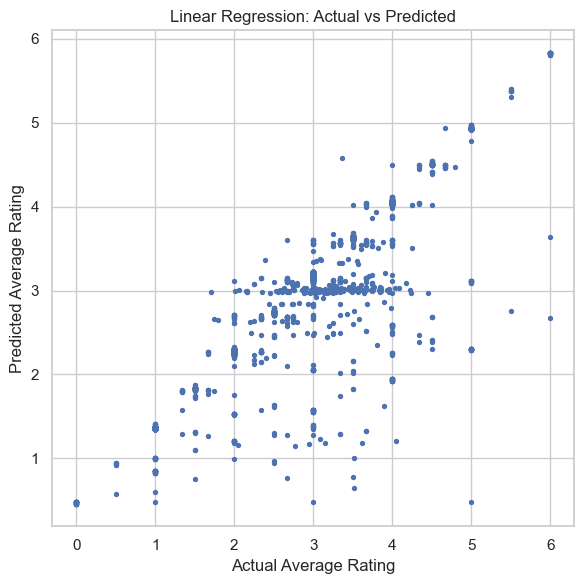

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

#prepare X and y
movie_stats_clean = movie_stats.dropna(subset=["avg_rating"]).copy()

#parameters used for x and y
X = movie_stats_clean[[
    "total_ratings",
    "unique_users",
    "std_rating",
    "min_rating",
    "max_rating",
    "year_of_release"
]].fillna(0)
y = movie_stats_clean["avg_rating"]

#split the data into train and test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#split the train data set again into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42
) 

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

#scaling the features 
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

#fitting the model into trained data
model = LinearRegression()
model.fit(X_train_s, y_train)

#validation
val_pred = model.predict(X_val_s)
val_mse = mean_squared_error(y_val, val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, val_pred)
val_r2 = r2_score(y_val, val_pred)

print("\nValidation:")
print(f"MSE:  {val_mse:.4f}")
print(f"RMSE: {val_rmse:.4f}")
print(f"MAE:  {val_mae:.4f}")
print(f"R^2:  {val_r2:.4f}")

#actual test data set 
test_pred = model.predict(X_test_s)
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("\nTest:")
print(f"MSE:  {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE:  {test_mae:.4f}")
print(f"R^2:  {test_r2:.4f}")

#plotting the graph
plt.figure(figsize=(6,6))
plt.scatter(y_test, test_pred, s=8)
plt.xlabel("Actual Average Rating")
plt.ylabel("Predicted Average Rating")
plt.title("Linear Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()


KMEANS CLUSTERING 

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#using the preivously cleaned ratings data
clean = df.copy() 

#date in datetime 
clean["date"] = pd.to_datetime(clean["date"], errors="coerce")

#recheck the ratings are between 0 and 5 
clean["rating"] = pd.to_numeric(clean["rating"], errors="coerce")
clean = clean[clean["rating"].between(0, 5)]

#load user stats 
user_stats_clean = clean.groupby("customer_id").agg(
    total_ratings = ("rating", "count"),
    avg_rating    = ("rating", "mean"),
    std_rating    = ("rating", "std"),
    min_rating    = ("rating", "min"),
    max_rating    = ("rating", "max"),
    unique_movies = ("movie_id", "nunique"),
    activity_days = ("date", lambda s: (s.max() - s.min()).days
                                  if s.notna().sum() > 1 else 0)
).reset_index()

# std can be NaN if user has only 1 rating → set to 0
user_stats_clean["std_rating"] = user_stats_clean["std_rating"].fillna(0)

#get the parameters needed for KMeans
user_features = user_stats_clean[[
    "total_ratings",
    "avg_rating",
    "std_rating",
    "unique_movies",
    "activity_days"
]].copy()

#remove users with no ratings 
user_features = user_features[user_features["total_ratings"] > 0].fillna(0)

# feature engineering 
user_features["ratings_per_day"] = (
    user_features["total_ratings"] / (user_features["activity_days"] + 1)
)
user_features["generosity"] = user_features["avg_rating"] - 3.0
user_features["consistency"] = 1 / (user_features["std_rating"] + 1)
user_features["engagement"] = (
    user_features["total_ratings"] * (user_features["activity_days"] + 1)
)

user_features = user_features.fillna(0)

#scaling the features for KMeans
scaler_users = StandardScaler()
X_users = scaler_users.fit_transform(user_features)


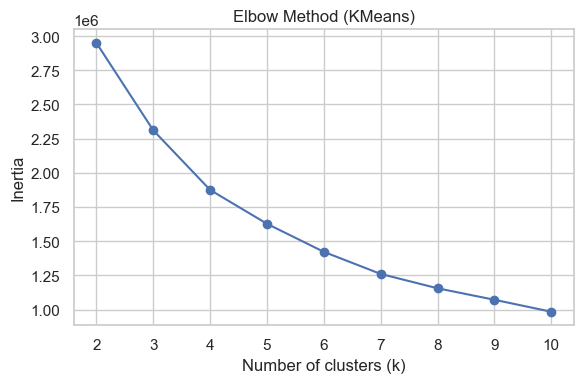

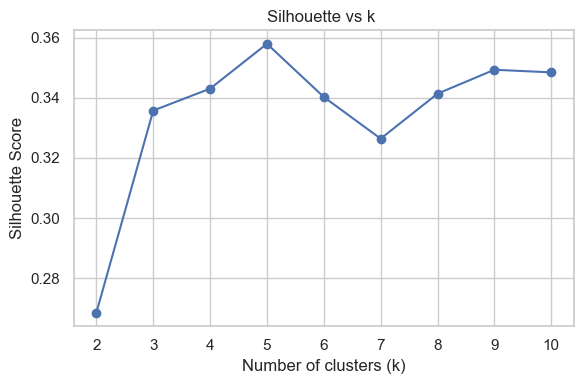

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

#possible kvalues
k_values = range(2, 11)

#using intertia and silhouette score to find k values 
inertia = []
sil_scores = []

#using a sample of users for silhouette 
sample_size = 2000
rng = np.random.default_rng(42)
sample_idx = rng.choice(
    X_users.shape[0],
    size=min(sample_size, X_users.shape[0]),
    replace=False
)
X_sample = X_users[sample_idx]

#lopping in theough with k
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_users)
    #using interia to the full data
    inertia.append(km.inertia_)
    #and silhouette forn the sample
    sample_labels = km.predict(X_sample)
    sil_scores.append(silhouette_score(X_sample, sample_labels))

#plot:using elbow method to find the optimal clusters
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method (KMeans)")
plt.xticks(list(k_values))
plt.tight_layout()
plt.show()

#plot:silhouette score vs k
plt.figure(figsize=(6, 4))
plt.plot(k_values, sil_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette vs k ")
plt.xticks(list(k_values))
plt.tight_layout()
plt.show()


In [39]:
#finding the optimal k value using the plots
k_opt = 5  
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
kmeans_final.fit(X_users)
user_segments = user_features.copy()
user_segments["cluster"] = kmeans_final.labels_


In [40]:
#summary of the clusters
cluster_summary = user_segments.groupby("cluster").agg(
    n_users = ("total_ratings", "size"),
    avg_total = ("total_ratings", "mean"),
    avg_unique = ("unique_movies", "mean"),
    avg_rating = ("avg_rating", "mean"),
    avg_std = ("std_rating", "mean"),
    ratings_per_day = ("ratings_per_day", "mean"),
    generosity = ("generosity", "mean"),
    consistency = ("consistency", "mean"),
    engagement = ("engagement", "mean"),
).round(3)

cluster_summary


,n_users,avg_total,avg_unique,avg_rating,avg_std,ratings_per_day,generosity,consistency,engagement
cluster,,,,,,,,,
0,31623,4.41,4.41,3.53,1.15,3.85,0.53,0.49,6.99
1,32306,37.75,37.75,3.51,0.94,0.08,0.51,0.52,"33,289.18"
2,98928,2.23,2.23,4.48,0.15,0.83,1.48,0.90,255.21
3,211957,9.27,9.27,3.60,1.01,0.09,0.60,0.51,"3,641.98"
4,53949,1.42,1.42,2.34,0.09,0.95,-0.66,0.95,90.17


In [41]:
from sklearn.cluster import KMeans

#from the plot we choose k = 5
k_o = 5

#fit kmeans on scales users matrix
kmeans = KMeans(n_clusters=k_o, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_users)

#attch the clusters into the data frame
user_segments = user_features.copy()
user_segments["cluster_kmeans"] = cluster_labels

#check how many users fall under each cluster 
print("Users per cluster:")
print(user_segments["cluster_kmeans"].value_counts().sort_index())

#information on each cluster 
for i in range(k_o):
    print(f"\nCluster {i} profile (user_features):")
    print(user_segments[user_segments["cluster_kmeans"] == i].describe())


Users per cluster:
cluster_kmeans
0     31623
1     32306
2     98928
3    211957
4     53949
Name: count, dtype: int64

Cluster 0 profile (user_features):
       total_ratings  avg_rating  std_rating  unique_movies  activity_days  \
count      31,623.00   31,623.00   31,623.00      31,623.00      31,623.00   
mean            4.41        3.53        1.14           4.41           0.16   
std             3.97        0.61        0.53           3.97           0.78   
min             2.00        1.29        0.00           2.00           0.00   
25%             2.00        3.20        0.71           2.00           0.00   
50%             3.00        3.50        1.00           3.00           0.00   
75%             5.00        4.00        1.41           5.00           0.00   
max            73.00        5.00        2.83          73.00          12.00   

       ratings_per_day  generosity  consistency  engagement  cluster_kmeans  
count        31,623.00   31,623.00    31,623.00   31,623.00    

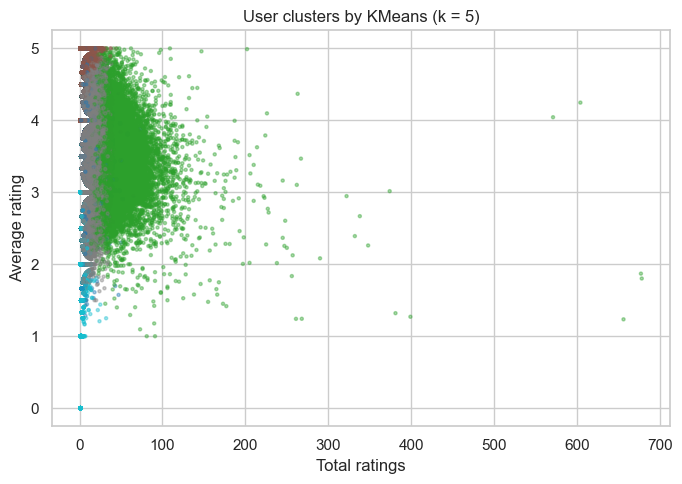

In [42]:
#plot of users per cluster in KMeans 
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
scatter = plt.scatter(
    user_segments["total_ratings"],
    user_segments["avg_rating"],
    c=user_segments["cluster_kmeans"],
    s=5,
    alpha=0.4,
    cmap="tab10"
)
plt.xlabel("Total ratings")
plt.ylabel("Average rating")
plt.title("User clusters by KMeans (k = 5)")
plt.tight_layout()
plt.show()


HIRACHEAL CLUSTERING

In [43]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np

#using a sample of users for clutering 
sample_size = min(7500, len(user_features))
rng = np.random.default_rng(42)
sample_idx = rng.choice(len(user_features), size=sample_size, replace=False)
user_sample = user_features.iloc[sample_idx].copy()

#using the same features used in KMeans 
h_features = user_sample[[
    "total_ratings",
    "avg_rating",
    "std_rating",
    "unique_movies",
    "activity_days",
    "ratings_per_day",
    "generosity",
    "consistency",
    "engagement",
]].fillna(0)

#scaling the data
scaler_h = StandardScaler()
sampleX = scaler_h.fit_transform(h_features)

#using the optimal  number of clusters again
h = AgglomerativeClustering(
    n_clusters=k_o,
    linkage="ward"
)
h_labels = h.fit_predict(sampleX)
user_sample["hierarchical_cluster"] = h_labels

# number of users in each cluster
print("\nUsers per cluster (Hierarchical, sample):")
print(user_sample["hierarchical_cluster"].value_counts().sort_index())

# overall cluester perfomance
clusters = user_sample.groupby("hierarchical_cluster")[[
    "total_ratings",
    "avg_rating",
    "std_rating",
    "unique_movies",
    "activity_days",
    "ratings_per_day",
    "generosity",
    "consistency",
    "engagement",
]].mean().round(3)

print("\nHierarchical clusters (mean features):")
print(clusters)



Users per cluster (Hierarchical, sample):
hierarchical_cluster
0    3825
1    1600
2      59
3     360
4    1656
Name: count, dtype: int64

Hierarchical clusters (mean features):
                      total_ratings  avg_rating  std_rating  unique_movies  \
hierarchical_cluster                                                         
0                              7.00        3.70        0.98           7.00   
1                             18.98        3.51        0.96          18.98   
2                             93.83        3.29        0.94          93.83   
3                              1.10        1.49        0.00           1.10   
4                              1.41        4.06        0.00           1.41   

                      activity_days  ratings_per_day  generosity  consistency  \
hierarchical_cluster                                                            
0                            164.26             0.74        0.70         0.53   
1                            8

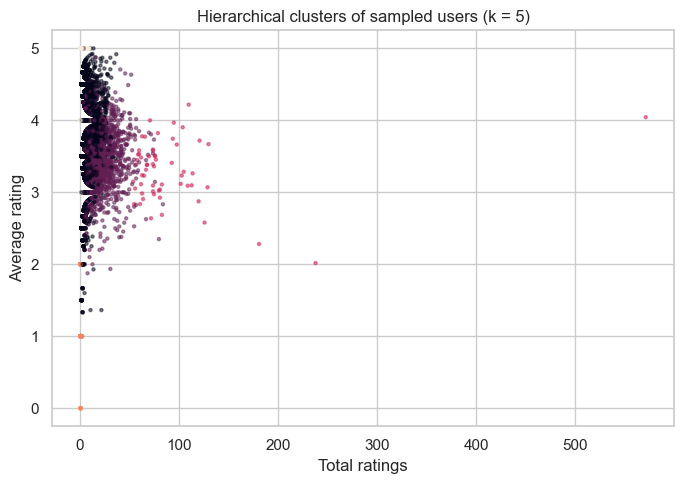

In [44]:
#plot of clusters in hierarchical
plt.figure(figsize=(7, 5))
plt.scatter(
    user_sample["total_ratings"],
    user_sample["avg_rating"],
    c=user_sample["hierarchical_cluster"],  # <- column from the fixed block
    s=5,
    alpha=0.5
)
plt.xlabel("Total ratings")
plt.ylabel("Average rating")
plt.title("Hierarchical clusters of sampled users (k = 5)")
plt.tight_layout()
plt.show()



In [45]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

#silhouette 
sil_h = silhouette_score(sampleX, user_sample["hierarchical_cluster"])
print(f"Hierarchical Silhouette Score: {sil_h:.4f}")

#davies-bouldin
db_h = davies_bouldin_score(sampleX, user_sample["hierarchical_cluster"])
print(f"Davies-Bouldin Score: {db_h:.4f}")



Hierarchical Silhouette Score: 0.2875
Davies-Bouldin Score: 1.0966


In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np

#sample of data to plot dendogram
dendro_sample_size = 300
rng = np.random.default_rng(42)
dendro_idx = rng.choice(len(X_users), size=dendro_sample_size, replace=False)
X_dendro = X_users[dendro_idx]


In [47]:
#help build model
Z = linkage(X_dendro, method='ward')

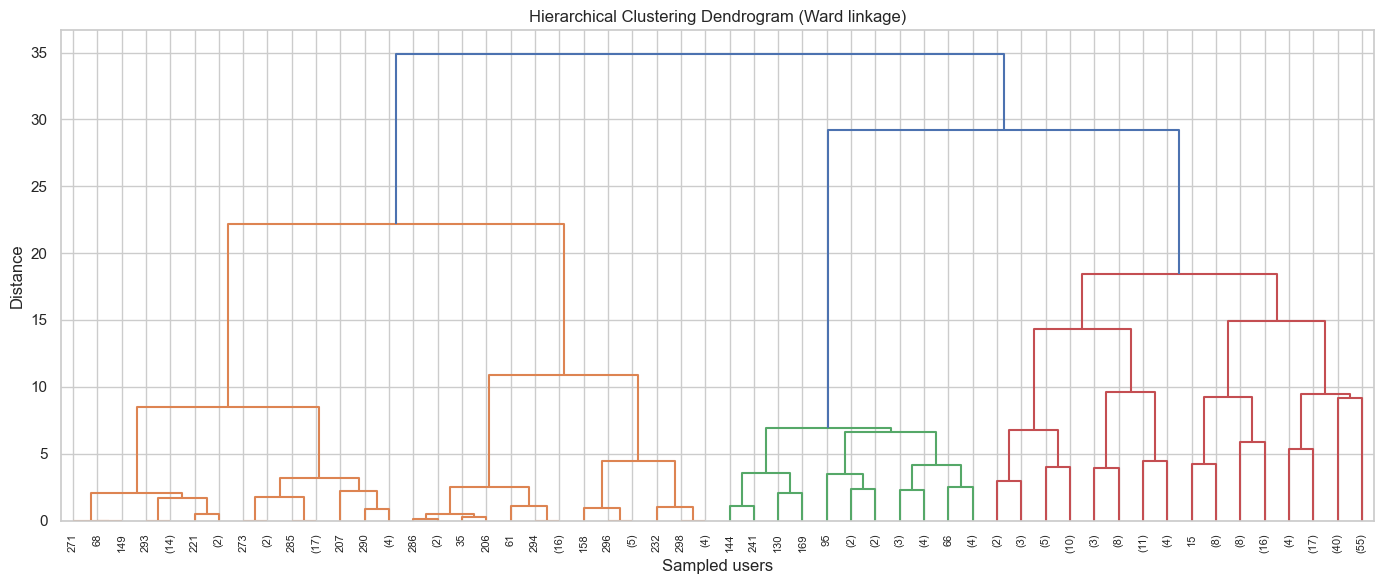

In [48]:
#plot of dendogram
plt.figure(figsize=(14, 6))
dendrogram(
    Z,
    truncate_mode='level',   
    p=5,                     
    leaf_rotation=90,
    leaf_font_size=8,
)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sampled users")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


In [50]:
# PART3 Experiments and Model Comparison
# Experiment 1: Compare Linear Regression vs a simple baseline on movie average ratings

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

#baseline model: always predict the mean of the training ratings
baseline_value=y_train.mean()
baseline_pred_test=np.full_like(y_test, baseline_value, dtype=float)

baseline_mse=mean_squared_error(y_test, baseline_pred_test)
baseline_rmse=np.sqrt(baseline_mse)
baseline_mae=mean_absolute_error(y_test, baseline_pred_test)
baseline_r2=r2_score(y_test, baseline_pred_test)

#Comparison table: baseline vs LR
regression_comparison=pd.DataFrame([
    {
        "model": "Baseline (predict mean rating)",
        "MSE": baseline_mse,
        "RMSE": baseline_rmse,
        "MAE":baseline_mae,
        "R2": baseline_r2,
    },
    {
        "model":"Linear Regression",
        "MSE":test_mse,
        "RMSE":test_rmse,
        "MAE":test_mae,
        "R2":test_r2,

    }
])
regression_comparison

,model,MSE,RMSE,MAE,R2
0,Baseline (predict mean rating),1.72,1.31,1.06,-0.00
1,Linear Regression,0.26,0.51,0.30,0.85


In [54]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import pandas as pd

cluster_cols = [c for c in user_segments.columns if "cluster" in c.lower()]
kmeans_cluster_col = cluster_cols[0]

labels_kmeans = user_segments[kmeans_cluster_col].to_numpy()

n_users = X_users.shape[0]
sample_size = min(2000, n_users)
idx = np.random.choice(n_users, size=sample_size, replace=False)

X_kmeans_sample = X_users[idx]
labels_kmeans_sample = labels_kmeans[idx]

sil_kmeans = silhouette_score(X_kmeans_sample, labels_kmeans_sample)
db_kmeans = davies_bouldin_score(X_kmeans_sample, labels_kmeans_sample)

labels_h = user_sample["hierarchical_cluster"].to_numpy()
sil_h = silhouette_score(sampleX, labels_h)
db_h = davies_bouldin_score(sampleX, labels_h)

cluster_quality = pd.DataFrame([
    {
        "model": "KMeans (k=5, sampled users)",
        "silhouette": sil_kmeans,
        "davies_bouldin": db_kmeans,
        "n_clusters": len(np.unique(labels_kmeans_sample)),
        "n_points": X_kmeans_sample.shape[0],
    },
    {
        "model": "Hierarchical (k=5, sample)",
        "silhouette": sil_h,
        "davies_bouldin": db_h,
        "n_clusters": len(np.unique(labels_h)),
        "n_points": sampleX.shape[0],
    },
])

cluster_quality

,model,silhouette,davies_bouldin,n_clusters,n_points
0,"KMeans (k=5, sampled users)",0.36,1.02,5,2000
1,"Hierarchical (k=5, sample)",0.29,1.10,5,7500


In [55]:
cluster_feature_cols = [
    "total_ratings",
    "avg_rating",
    "std_rating",
    "unique_movies",
    "activity_days",
    "ratings_per_day",
    "generosity",
    "consistency",
    "engagement",
]

kmeans_sizes = user_segments[kmeans_cluster_col].value_counts().sort_index()
hier_sizes = user_sample["hierarchical_cluster"].value_counts().sort_index()

cluster_sizes = pd.DataFrame({
    "kmeans_users": kmeans_sizes,
    "hierarchical_sample_users": hier_sizes,
}).fillna(0).astype(int)

cluster_sizes

kmeans_profiles = (
    user_segments
    .groupby(kmeans_cluster_col)[cluster_feature_cols]
    .mean()
    .round(3)
)

kmeans_profiles

hier_profiles = (
    user_sample
    .groupby("hierarchical_cluster")[cluster_feature_cols]
    .mean()
    .round(3)
)

hier_profiles



,total_ratings,avg_rating,std_rating,unique_movies,activity_days,ratings_per_day,generosity,consistency,engagement
hierarchical_cluster,,,,,,,,,
0,7.00,3.70,0.98,7.00,164.26,0.74,0.70,0.53,"1,408.63"
1,18.98,3.51,0.96,18.98,817.16,0.05,0.51,0.52,"14,483.00"
2,93.83,3.29,0.94,93.83,"1,154.71",0.18,0.29,0.52,"94,203.76"
3,1.10,1.49,0.00,1.10,5.50,1.01,-1.51,1.00,12.25
4,1.41,4.06,0.00,1.41,22.09,0.97,1.06,1.00,65.58


,model,MSE,RMSE,MAE,R2
0,Baseline (predict mean rating),1.72,1.31,1.06,-0.00
1,Linear Regression,0.26,0.51,0.30,0.85


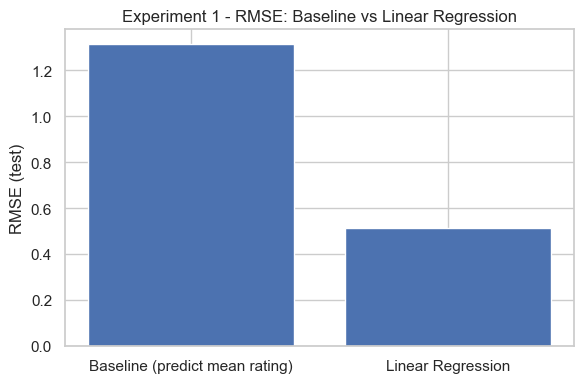

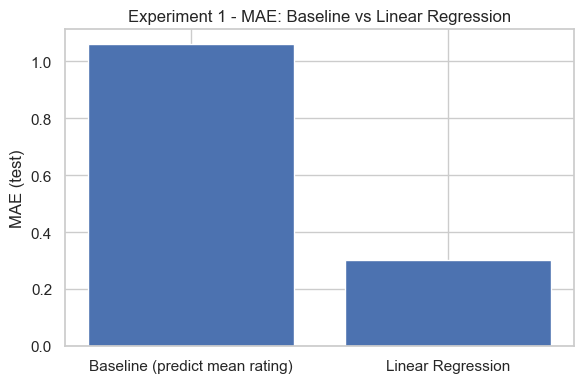


Cluster profiles (mean / median of key user features):
               total_ratings        avg_rating        std_rating         \
                        mean median       mean median       mean median   
cluster_kmeans                                                            
0                       4.41   3.00       3.53   3.50       1.14   1.00   
1                      37.75  34.00       3.51   3.51       0.95   0.93   
2                       2.23   1.00       4.48   4.50       0.15   0.00   
3                       9.27   7.00       3.60   3.62       1.01   0.96   
4                       1.42   1.00       2.34   2.67       0.09   0.00   

               unique_movies         
                        mean median  
cluster_kmeans                       
0                       4.41   3.00  
1                      37.75  34.00  
2                       2.23   1.00  
3                       9.27   7.00  
4                       1.42   1.00  

Temporal analysis skipped: column 'fir

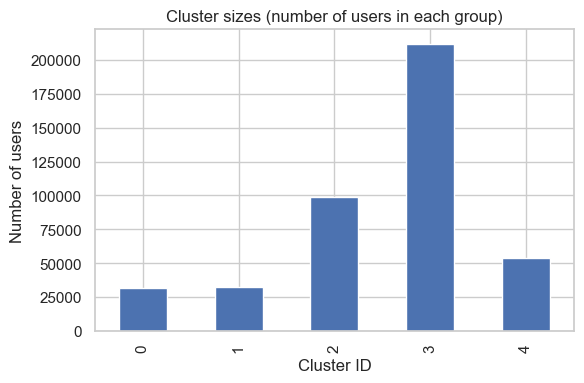


Distribution of total_ratings and avg_rating by cluster:
               total_ratings                                            \
                       count  mean   std  min   25%   50%   75%    max   
cluster_kmeans                                                           
0                  31,623.00  4.41  3.97 2.00  2.00  3.00  5.00  73.00   
1                  32,306.00 37.75 21.01 2.00 26.00 34.00 44.00 678.00   
2                  98,928.00  2.23  2.21 1.00  1.00  1.00  3.00  44.00   
3                 211,957.00  9.27  6.51 2.00  4.00  7.00 13.00  40.00   
4                  53,949.00  1.42  0.97 1.00  1.00  1.00  2.00  32.00   

               avg_rating                                     
                    count mean  std  min  25%  50%  75%  max  
cluster_kmeans                                                
0               31,623.00 3.53 0.61 1.29 3.20 3.50 4.00 5.00  
1               32,306.00 3.51 0.45 1.00 3.23 3.51 3.80 5.00  
2               98,928.00 4.48 0.4

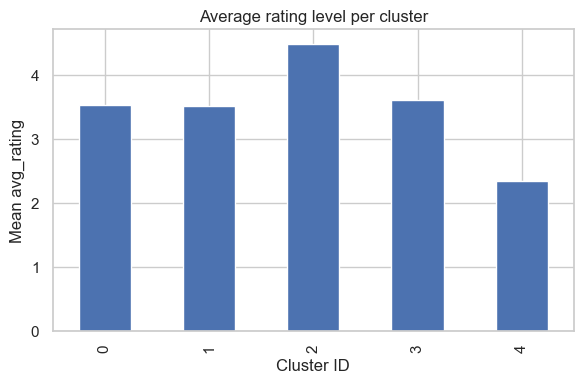

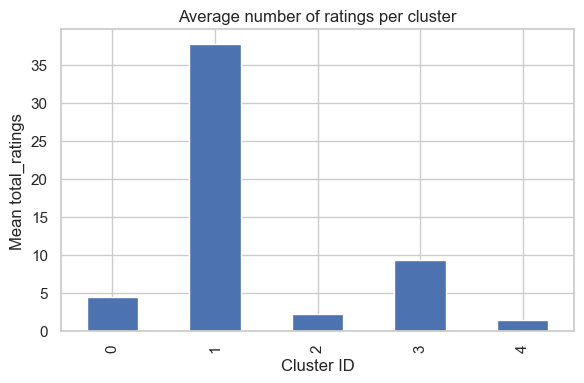


Saved 'user_features.csv' with user-level behaviour features, cluster labels and first_year (if available).


In [60]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from IPython.display import display

os.makedirs("images", exist_ok=True)

users_vis = user_segments.copy()

cluster_cols = [c for c in users_vis.columns if "cluster" in c.lower()]
if not cluster_cols:
    raise ValueError("No cluster column found in user_segments.")
cluster_col = cluster_cols[0]

# 4.1 Regression experiment – Baseline vs Linear Regression
display(regression_comparison)

plt.figure(figsize=(6, 4))
plt.bar(regression_comparison["model"], regression_comparison["RMSE"])
plt.ylabel("RMSE (test)")
plt.title("Experiment 1 - RMSE: Baseline vs Linear Regression")
plt.tight_layout()
plt.savefig("images/part4_regression_rmse_comparison.png")
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(regression_comparison["model"], regression_comparison["MAE"])
plt.ylabel("MAE (test)")
plt.title("Experiment 1 - MAE: Baseline vs Linear Regression")
plt.tight_layout()
plt.savefig("images/part4_regression_mae_comparison.png")
plt.show()

# 4.2 Cluster profiles
cluster_profile_4 = (
    users_vis.groupby(cluster_col)[[
        "total_ratings",
        "avg_rating",
        "std_rating",
        "unique_movies"
    ]]
    .agg(["mean", "median"])
)

print("\nCluster profiles (mean / median of key user features):")
print(cluster_profile_4.round(2))

# 4.3 Temporal fairness check – only if first_rating_date exists
if "first_rating_date" in users_vis.columns:
    users_vis["first_rating_date"] = pd.to_datetime(
        users_vis["first_rating_date"], errors="coerce"
    )
    users_vis["first_year"] = users_vis["first_rating_date"].dt.year

    temporal_summary_4 = (
        users_vis.groupby(cluster_col)["first_year"]
        .agg(["min", "max", "median"])
        .sort_index()
    )

    print("\nFirst_year summary per cluster (min / max / median):")
    print(temporal_summary_4)
else:
    print("\nTemporal analysis skipped: column 'first_rating_date' not found in user_segments.")
    users_vis["first_year"] = np.nan  # placeholder so the CSV still has the column

# Cluster sizes (always available)
cluster_sizes_4 = users_vis[cluster_col].value_counts().sort_index()

plt.figure(figsize=(6, 4))
cluster_sizes_4.plot(kind="bar")
plt.xlabel("Cluster ID")
plt.ylabel("Number of users")
plt.title("Cluster sizes (number of users in each group)")
plt.tight_layout()
plt.savefig("images/part4_cluster_sizes.png")
plt.show()

# 4.4 Rating behaviour by cluster
activity_rating_4 = (
    users_vis.groupby(cluster_col)[["total_ratings", "avg_rating"]]
    .describe()
)

print("\nDistribution of total_ratings and avg_rating by cluster:")
print(activity_rating_4.round(2))

mean_avg_rating = users_vis.groupby(cluster_col)["avg_rating"].mean()

plt.figure(figsize=(6, 4))
mean_avg_rating.plot(kind="bar")
plt.xlabel("Cluster ID")
plt.ylabel("Mean avg_rating")
plt.title("Average rating level per cluster")
plt.tight_layout()
plt.savefig("images/part4_mean_rating_per_cluster.png")
plt.show()

mean_total_rating = users_vis.groupby(cluster_col)["total_ratings"].mean()

plt.figure(figsize=(6, 4))
mean_total_rating.plot(kind="bar")
plt.xlabel("Cluster ID")
plt.ylabel("Mean total_ratings")
plt.title("Average number of ratings per cluster")
plt.tight_layout()
plt.savefig("images/part4_mean_total_ratings_per_cluster.png")
plt.show()

# 4.5 Export enriched user table for report
users_final = users_vis.copy()
users_final.to_csv("user_features.csv", index=False)

print("\nSaved 'user_features.csv' with user-level behaviour features, cluster labels and first_year (if available).")